In [ ]:
#stock prediction using stacked LSTM

In [ ]:
# Keras and TensorFlow >2.0

In [1]:
#data collection
#import pandas_datareader as pdr
#key=""

In [ ]:
#df=pdr.get_data_tiingo('GOOG',api_key=key)

In [ ]:
#df.to_csv("GOOG".csv)

In [13]:
import pandas as pd

In [15]:
df=pd.read_csv('GOOG.csv')

In [16]:
df.head()

symbol                       date   close  ...  adjVolume  divCash  splitFactor
0   GOOG  2016-06-14 00:00:00+00:00  718.27  ...    1306065      0.0          1.0
1   GOOG  2016-06-15 00:00:00+00:00  718.92  ...    1214517      0.0          1.0
2   GOOG  2016-06-16 00:00:00+00:00  710.36  ...    1982471      0.0          1.0
3   GOOG  2016-06-17 00:00:00+00:00  691.72  ...    3402357      0.0          1.0
4   GOOG  2016-06-20 00:00:00+00:00  693.71  ...    2082538      0.0          1.0

[5 rows x 14 columns]

In [17]:
df.tail()

symbol                       date  ...  divCash  splitFactor
1253   GOOG  2021-06-07 00:00:00+00:00  ...      0.0          1.0
1254   GOOG  2021-06-08 00:00:00+00:00  ...      0.0          1.0
1255   GOOG  2021-06-09 00:00:00+00:00  ...      0.0          1.0
1256   GOOG  2021-06-10 00:00:00+00:00  ...      0.0          1.0
1257   GOOG  2021-06-11 00:00:00+00:00  ...      0.0          1.0

[5 rows x 14 columns]

In [18]:
df1=df.reset_index()['close']


In [19]:
df1

0        718.27
1        718.92
2        710.36
3        691.72
4        693.71
         ...   
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
1257    2513.93
Name: close, Length: 1258, dtype: float64

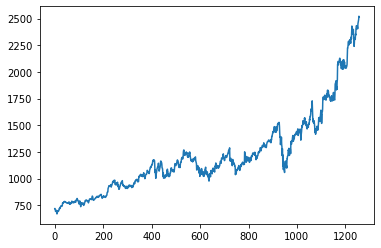

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [21]:
import numpy as np

In [22]:
df1

0        718.27
1        718.92
2        710.36
3        691.72
4        693.71
         ...   
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
1257    2513.93
Name: close, Length: 1258, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.02698372]
 [0.02733443]
 [0.02271575]
 ...
 [0.98370509]
 [1.        ]
 [0.99586153]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(817, 441)

In [27]:
train_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       [0.01265823],
       [0.01373196],
       [0.0149352 ],
       [0.01575534],
       [0.01813483],
       [0.00375538],
       [0.        ],
       [0.00635609],
       [0.00855213],
       [0.01286326],
       [0.01669958],
       [0.01415283],
       [0.0159226 ],
       [0.01462225],
       [0.0201636 ],
       [0.02526789],
       [0.02826249],
       [0.02628768],
       [0.02842975],
       [0.02783623],
       [0.03535239],
       [0.03706821],
       [0.03935058],
       [0.03796929],
       [0.04018691],
       [0.03858439],
       [0.03785598],
       [0.03966353],
       [0.04189733],
       [0.05424261],
       [0.05644944],
       [0.05547282],
       [0.05661131],
       [0.05576419],
       [0.06148899],
       [0.06124079],
       [0.0625897 ],
       [0.06281632],
       [0.06290805],
       [0.06202855],
       [0.06160769],
       [0.05874799],
       [0.06024259],
       [0.05894223],
       [0.057

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 283ms/step - loss: 0.0077 - val_loss: 0.0763
Epoch 2/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0019 - val_loss: 0.0291
Epoch 3/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0010 - val_loss: 0.0184
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 6.6553e-04 - val_loss: 0.0189
Epoch 5/100
12/12 [==============================] - 2s 176ms/step - loss: 4.9283e-04 - val_loss: 0.0119
Epoch 6/100
12/12 [==============================] - 2s 176ms/step - loss: 4.5909e-04 - val_loss: 0.0095
Epoch 7/100
12/12 [==============================] - 2s 177ms/step - loss: 4.3273e-04 - val_loss: 0.0080
Epoch 8/100
12/12 [==============================] - 2s 176ms/step - loss: 4.4303e-04 - val_loss: 0.0084
Epoch 9/100
12/12 [==============================] - 2s 180ms/step - loss: 4.1812e-04 - val_loss: 0.0086
Epoch 10/100
12/12 [==============================] - 2s 174ms/step

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.7.0'

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1041.6023449238307

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1569.578938065975

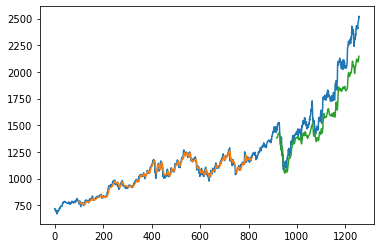

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

441

In [46]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.6575372031035861,
 0.6598843169628886,
 0.6651720677263752,
 0.6642817831590534,
 0.6739076478142166,
 0.6272621321506038,
 0.6447009183420204,
 0.629932985852569,
 0.6653339376477062,
 0.6794489947877885,
 0.7563695814043837,
 0.7522149200902156,
 0.7714396710803199,
 0.7686932780817336,
 0.7636213538800222,
 0.770026007100694,
 0.770301185966957,
 0.7747364218114324,
 0.7843353081463736,
 0.7877939287988173,
 0.7817993460455178,
 0.7731339095902533,
 0.7535692317653534,
 0.756795838863889,
 0.7699126981557621,
 0.7354829658886118,
 0.7384505811130176,
 0.7625422210711473,
 0.7594828795579874,
 0.732973982107978,
 0.745049478239287,
 0.7771267009830901,
 0.7316034834407071,
 0.7469973129593058,
 0.7482545026816453,
 0.780488199682735,
 0.7519721152082187,
 0.7544379336764976,
 0.768482847184003,
 0.7677058715616131,
 0.7381052586141778,
 0.7418714321171508,
 0.7393840309926943,
 0.7471376002244597,
 0.7428750256294042,
 0.7424973291462981,
 0.7377437491232047,
 0.7487509037737273,


In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81042004]
101
1 day input [0.65988432 0.66517207 0.66428178 0.67390765 0.62726213 0.64470092
 0.62993299 0.66533394 0.67944899 0.75636958 0.75221492 0.77143967
 0.76869328 0.76362135 0.77002601 0.77030119 0.77473642 0.78433531
 0.78779393 0.78179935 0.77313391 0.75356923 0.75679584 0.7699127
 0.73548297 0.73845058 0.76254222 0.75948288 0.73297398 0.74504948
 0.7771267  0.73160348 0.74699731 0.7482545  0.7804882  0.75197212
 0.75443793 0.76848285 0.76770587 0.73810526 0.74187143 0.73938403
 0.7471376  0.74287503 0.74249733 0.73774375 0.7487509  0.74852968
 0.75559261 0.79288744 0.84026137 0.83982971 0.8532811  0.86178467
 0.87281341 0.85603829 0.86277208 0.85606527 0.87862993 0.87922346
 0.88172704 0.87699505 0.87681159 0.86312279 0.88868745 0.89486009
 0.8842738  0.92354884 0.95051637 0.93984914 0.93178262 0.90970356
 0.91104708 0.92432581 0.93368189 0.90291042 0.88515869 0.8475617
 0.85991237 0.88915148 0.8919842  0.8822828  0.88513171 0.91069636
 0.90476653 0.93798763 0.93928259 0

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

1258

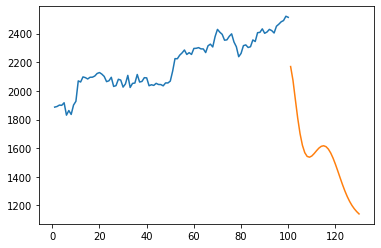

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

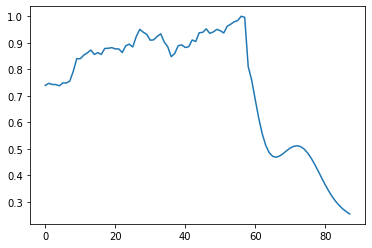

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()

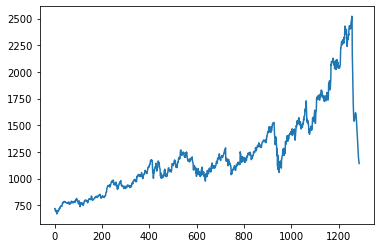

In [56]:
plt.plot(df3)